# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?


   

Q) Is the sample size large? Are the observations independent?
       
A) The sample size is not particularly large, a larger sample size would decrease the potential margin of error. Given the  normal distribution and it is reasonable to assume that the results are independent. As the central limit theorem states: independent and identically distributed variables should be normaly distributed. 
    
Q) Is the true population mean really 98.6 degrees F?
    Null hypothesis: The true mean body temperature reported in the tests is actually equal to the standard 98.6.  
    
A) No, in actuality the average temperature was first determined in Celsius and was rounded to a full degree (37 degrees Celsius). However 37 C is equal to 98.6 F. To prove this, I ran a bootstrap hypothesis test, creating 10,000 sample populations. I got a p-value of 0.000 of the 10,000 populations samples I created 0 had had a mean equal to or greater than the accepted standard mean body temperature of 98.6 degrees F. 



In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('data/human_body_temperature.csv')

1) Is the distribution of body temperatures normal? 
    
  
  Yes, the distribution of body temperatures is normal in the data set. First in the histogram with the kernel density estimate line, you can see a symmetrical bell curve. Even more compelling, the dataset created by Numpy's random.normal function had a cumulative distribution function graph that was nearly identical to that of the original data set. Further when investigating the quartile distribution of the 25%, 50%, and 75% the values of original data was essentially identical with the normalized data. The only difference was the original data was only measured to the tenth while the normalized data when rounded to the nearest tenth was equal. That the minimum and maximum would not be identical is to be expected because minimum and max represent the greatest outliers and therefore the most randomness. 

2) Is the sample size large? Are the observations independent?
    
    
  The sample size is not particularly large, a larger sample size would decrease the potential margin of error. Given the  normal distribution and how it one could assume that the results were independent. As the central limit theorem states that independent and identically distributed variables be normaly distributed. 

98.24923076923078


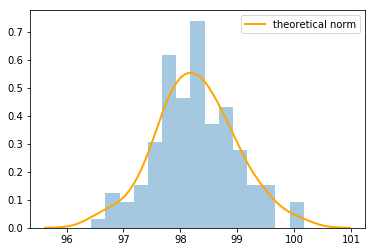

<function matplotlib.pyplot.show(*args, **kw)>

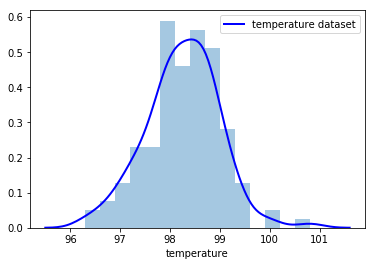

In [59]:
np.random.seed(6)
mean = np.mean(df.temperature)
print(mean)
std = np.std(df.temperature)
theoretical_value = np.random.normal(loc = mean, scale = std, size = 130)
sns.distplot(theoretical_value,kde_kws = {"color": "orange", "lw": 2, "label": "theoretical norm"}, bins=15)
plt.show()
sns.distplot(df.temperature, kde_kws={"color": "blue", "lw": 2, "label": "temperature dataset"}, bins=15)
plt.show


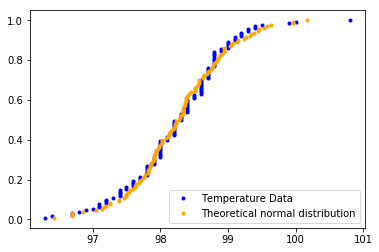

In [60]:
x = np.sort(df['temperature'])
y = np.arange(1, len(x)+1) / len(x)
x1 = np.sort(theoretical_value)
y1 = np.arange(1, len(x1)+1) / len(x1)
plt.plot( x, y, marker = '.', linestyle = 'none', color = 'blue')
plt.plot( x1, y1, marker = '.', linestyle = 'none', color = 'orange')
plt.legend(['Temperature Data', 'Theoretical normal distribution'])
plt.show()



In [61]:
print('Description of original temperature data:')
print(df['temperature'].describe())
print('Description of normalized temperature data')
print(pd.DataFrame(theoretical_value).describe())


Description of original temperature data:
count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64
Description of normalized temperature data
                0
count  130.000000
mean    98.268356
std      0.708411
min     96.432991
25%     97.840656
50%     98.279234
75%     98.746926
max    100.171007


In [62]:
print(np.mean(df.temperature)) 
standard_value =98.6
#def bootstrap_replicate_1d(data):
    #bs_rep = np.mean(np.random.choice(data, size=len(data)))
#def draw_bs_replicates(data, size):
#bs_replicates = np.empty(1000)
#for i in range(1000):
    #y = np.random.choice(df.temperature, len(df.temperature))
    #y = np.mean(y)
    #print(y)
        #func(np.random.choice(data, size=len(data))
   # bs_replicates[i] = y
    #return bs_replicates
#bs_replicates = draw_bs_replicates(df.temperature, 1000)
#print(bs_replicates)
experiment_shifted = df.temperature - np.mean(df.temperature) + standard_value
# test statistic is the mean of the bootstrap sample minus the standard value

def diff_from_standard(data, standard_value = 98.6):
    difference = np.mean(data) - standard_value
    print(f' the difference between the standard accepted temperature and the measured temperature is: {difference} degrees')
    return(difference)

diff_obs = diff_from_standard(data = df.temperature)
bs_replicates = np.empty(10000)
for i in range(10000):
    y = np.random.choice(experiment_shifted, len(df.temperature))
    bs_replicates[i] = np.mean(y)
    
#draw_bs_replicates(experiment_shifted, mean, 10000)
#print(bs_replicates)
#bs_replicates = float(bs_replicates)
#p_value = np.sum(
SUM = np.array(bs_replicates <= np.mean(df.temperature))
p_value = np.sum(SUM/10000)
print(f'p-value: {p_value}')

98.24923076923078
 the difference between the standard accepted temperature and the measured temperature is: -0.35076923076921673 degrees
p-value: 0.0


Is the true population mean really 98.6 degrees F?

Null hypothesis: The true mean body temperature reported in the tests is actually equal to the standard 98.6.  
    
No, in actuality the average temperature was first determined in Celsius (37 degrees) and was rounded to a full degree. However 37 C is equal to 98.6 F. To prove this, I ran a bootstrap hypothesis test, creating 10,000 sample populations and I got a p-value of 0.000. 
    
Above, you can see the coding. I ran a bootstrap Hypothesis test where I changed the values of all recorded temperatures in the data set by the difference between the mean of the recorded temperatures and the standard accepted average of 98.6 degrees. I then created 10,000 bootstrap samples of the shifted data set. Of all of the 10,000 samples not one had an average equal to or less than the original dataset. This gives a p_value of 0 and indicates it was not randomness that caused the difference between the standard accepted body temperature and the mean of the dataset .

In [63]:
from scipy.stats import ttest_1samp
t_test = ttest_1samp(df.temperature, 98.6)
print('t-test results for temperature dataset vs. standard accepted body temperature of 98.6 degrees Fahrenheit' )
print(t_test)

t-test results for temperature dataset vs. standard accepted body temperature of 98.6 degrees Fahrenheit
Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


In [64]:
from statsmodels.stats.weightstats import ztest
(print('z-test results for temperature dataset vs. standard accepted body temperature of 98.6 degrees Fahrenheit' ))
ztest(df.temperature, value = 98.6)

z-test results for temperature dataset vs. standard accepted body temperature of 98.6 degrees Fahrenheit


(-5.4548232923645195, 4.9021570141012155e-08)

 Q)  Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
  
 A)  When running a frequentist statistical test comparing the dataset to the standard accepted body temperature of 98.6 it would be appropriate ot use a one sample test. This is because we do not have a sample from which 98.6 is based. 
 
Q)In this situation, is it appropriate to use the t or z statistic? 

A) It is appropraite to use the t statitistic. This is because while our data has a normal distribution and is relatively large we can not be sure of the true population's mean or standard deviation. therefore it is more appropriate to use the t statistic

Draw a small sample of size 10 from the data and repeat both frequentist tests. 
   

In [65]:
small_sample = np.random.choice(df.temperature, size = 10)
print(small_sample)

[99.4 97.6 97.1 99.1 99.  99.  98.1 97.8 98.  98.4]


In [66]:
from scipy.stats import ttest_1samp
t_test = ttest_1samp(small_sample, 98.6)
print('t-test results for SMALL SAMPLE temperature dataset vs. standard accepted body temperature of 98.6 degrees Fahrenheit' )
print(t_test)

t-test results for SMALL SAMPLE temperature dataset vs. standard accepted body temperature of 98.6 degrees Fahrenheit
Ttest_1sampResult(statistic=-1.047645443654364, pvalue=0.32212063472249053)


In [67]:
from statsmodels.stats.weightstats import ztest
(print('z-test results for SMALL SAMPLE temperature dataset vs. standard accepted body temperature of 98.6 degrees Fahrenheit' ))
ztest(small_sample, value = 98.6)

z-test results for SMALL SAMPLE temperature dataset vs. standard accepted body temperature of 98.6 degrees Fahrenheit


(-1.047645443654364, 0.2948019919337064)

Which one is the correct one to use? The correct one to use is unquestionably the t-statistic. With such a small sample we cannot excpect normal distrubution and we could not even attempt to derive the population mean, standard deviation. Using such a small sample will lead to outliers causing a much bigger effect on mean and variance.

In [68]:
STD = (np.std(df.temperature))

In [69]:
conf_interval = np.percentile(df.temperature, [2.5, 97.5])
print(type(conf_interval))
print(conf_interval)
print(float(np.mean(df.temperature)) + 2 * STD)
print(np.mean(df.temperature) - 2 * STD)


<class 'numpy.ndarray'>
[96.7225 99.4775]
99.70994632704085
96.7885152114207


In [70]:
Fdf = df.loc[df['gender'] == 'F']
mean_female_temp = np.mean(Fdf.temperature)
print(f'avg female temp = {mean_female_temp}')
Mdf = df.loc[df['gender'] =='M']
mean_male_temp = np.mean(Mdf.temperature)
mean_temp_dif = np.mean(Fdf.temperature) - np.mean(Mdf.temperature)
print(f'In the dataset Females on average have a temperate of {mean_temp_dif} degrees Fahrenheit higher than males.')
print(f'avg male temp = {np.mean(Mdf)}')
mean_temp = (np.mean(Fdf.temperature) + np.mean(Mdf.temperature))/2
print(f'mean temperature = {mean_temp}')
print((mean_male_temp + mean_female_temp)/2)


avg female temp = 98.39384615384613
In the dataset Females on average have a temperate of 0.289230769230727 degrees Fahrenheit higher than males.
avg male temp = temperature    98.104615
heart_rate     73.369231
dtype: float64
mean temperature = 98.24923076923076
98.24923076923076


In [71]:
np.random.seed(44)
ftemp = Fdf.temperature
mtemp = Mdf.temperature
f_shift = ftemp - np.mean(Fdf.temperature) + mean_temp
m_shift = mtemp - np.mean(Mdf.temperature) + mean_temp
def bs_draw(M_shift, F_shift , sample_size = 10000):
    #M_replicates = np.empty(10000)
    #F_replicates = np.empty(10000)
    replicate_dif = np.empty(10000)
    for i in range(10000):
        F_replicate = np.random.choice(F_shift, len(F_shift))
        M_replicate = np.random.choice(M_shift, len(M_shift))
        replicate_dif[i] = np.mean(F_replicate) - np.mean(M_replicate)
    sum_gender_dif = np.array(replicate_dif >= mean_temp_dif)
    print (f'Total Number of sample population with variance greater than critical value is {np.sum(sum_gender_dif)} out of 10,000')
    print (f'p_value = {np.sum(sum_gender_dif)/10000}')
bs_draw(m_shift, f_shift)





Total Number of sample population with variance greater than critical value is 134 out of 10,000
p_value = 0.0134


Using the bootstrap method there is a significant difference between males and females in body temperature. In order to reach this conclusion I did a two variable hypothesis test. I did this using the bootstrap method with 10,000 population samples and a population size of equal to the number of male and females in the population, respectively.  I used variance as the testing statistic because I was comparing the difference in males and females and wanted to see if the respective difference  in variance could be caused by randomnees. 

In [72]:
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
t_test = ttest_ind(ftemp, mtemp )
print('t_test and z_test frequencey testing')
print(f' results from t-statistic test: {t_test}')
z_stat = ztest(x1 = ftemp, x2 = mtemp)
print(f' results from z-statistic test: {z_stat}')

t_test and z_test frequencey testing
 results from t-statistic test: Ttest_indResult(statistic=2.2854345381656103, pvalue=0.02393188312239561)
 results from z-statistic test: (2.2854345381656103, 0.02228736076065755)


Using frequency testing there is a significant difference between males and females in body temperatre temperature. In order to reach this conclusion I did a two variable test. Both the z statistic and t statistic had the same value even though one was derived with scipy.stats and the other from the statsmodels package. Similarly to the p-value from the bootstrap method the p_value also indicated the difference in body temperature of male and female is significant. the p_value in t-stat frequency test was .024% and the p_value for the z-stat frequency test was .022

Q) At what temperature should we consider someone's temperature to be "abnormal"?
    
A) A good range of temperature to classify as abnormal would be the temperature 2 standard deviations above or below the mean. This is also referred to as the confidence interval. 
in this case the 95% frequency interval is between: [96.7225 and 99.4775]
2 standard deviations above is : 99.70994632704085
2 standard deviations below is : 96.7885152114207

Q) As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.(!!What is bootstrap vs. frequentist approach??) 

Q)Is there a significant difference between males and females in normal temperature?
    
A)Yes there is a significant difference between males and females in normal temperature. In order to reach this conclusion I did a two variable hypothesis test. I did this using the bootstrap method with 10,000 population samples and a population size of equal to the number of male and females in the population, respectively.  I used variance as the testing statistic because I was comparing the difference in males and females and wanted to see if the respective difference  in variance could be caused by randomnees. I also ran frequency testing using both the T and z-statistic. Similarly to the bootstraping two variable hypothesis test, the frequency tests found there was a significant difference in temperatures between male and female.

